## **Предисловие**:
к идее данного анализа привело голосование на Евровидении 2022

## **Задача**

**Дано**:
1. Имеется 39 стран, которые ставят оценки одной стране
2. Оценки могут варьироваться и каждая страна может поставить другой стране только одну оценку из ряда 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12

**Найти**:

С какой вероятностью одна страна получит ту сумму оценкок от всех стран, которую получил победитель на Евровидение 2022 ?




### примечание:
1. Целью решения данной задачи является получение ответа на вопрос в п.Найти, цель - математическая
2. К сожалению, решение №1 данной задачи способом, который предложен, требует достаточной мощности ПК, которой автор не обладает. В связи с этим решение №1 было разделено на две части. С учетом ограничений рассматриваются top27 стран и bottom27 стран. 27 стран - максимальное число для расчета комбинаторики вариантов оценок, которое используемый ПК смог обработать до конца без прерывания процесса с выдачей сообщения об ошибке. Данный способ расчета сопроваждался заполнением ОЗУ полностью, а также увеличеныем временного файла в размере до 20Гб.
3. Некоторые блоки решения будут представлены "как-есть" без необходимости запуска. Конечный файл выложен по ссылке
4. Используемое оборудование: CPU Intel Core-i7 6700 3.4GHz, ОЗУ: 32Гб, основной накопитель M2 256Гб
5. Данные: https://eurovisionworld.com/eurovision/2022
6. Полное решение поставленной задачи приведено в разделе "Решение №2"
7. Файл для решения №1: https://drive.google.com/file/d/18HWRtddUBvn5HkIg0tKigfYmCWMjjO4j/view?usp=sharing
8. Файл для решения №2: https://drive.google.com/file/d/14JbHn39PVzlOK1PvyJcV3xWDq4bze73W/view?usp=sharing

## Решение №1

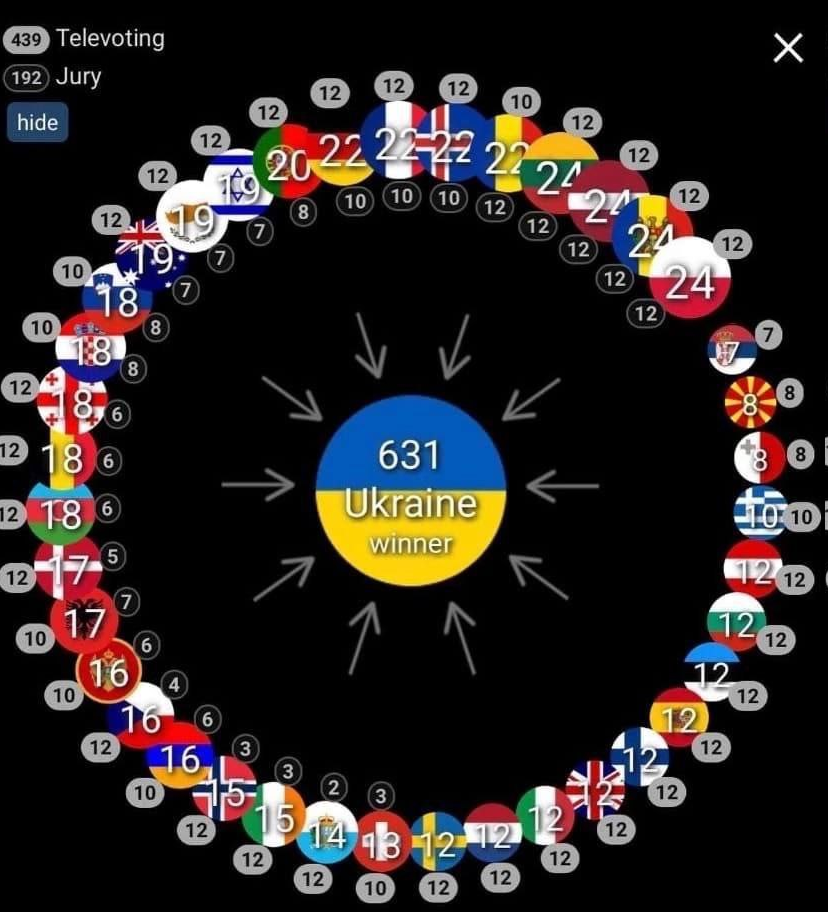

In [2]:
import time
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import math
import time

import warnings
warnings.filterwarnings('ignore')

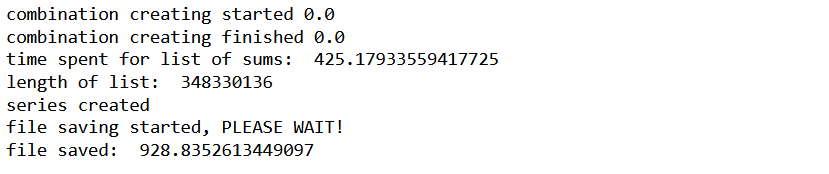

In [2]:
time_spent = 929
time_spent = pd.to_timedelta(time_spent, unit='s')
time_spent

Timedelta('0 days 00:15:29')

Общая продолжительность работы над генерацией и сохранением датасета заняла более 15 мину

In [3]:
df = pd.read_csv("M://out27c.csv")    # датасет в переменную

In [4]:
print('Кол-во записей: ', len(df))

Кол-во записей:  348330136


In [5]:
df.reset_index(drop=True).head()

,Unnamed: 0,0
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [6]:
df.columns = ['number', 'summs']   # смена названий колонок
df.sample(5)

,number,summs
64852082,64852082,85
188394078,188394078,85
46208121,46208121,111
22527160,22527160,112
334839165,334839165,222


In [7]:
gr = df.groupby('summs',as_index=False).number.count()    # подсчет кол-ва вариантов одной итоговой оценки
gr.sample(5)

,summs,number
278,278,2440
204,204,769196
169,169,2868261
152,152,3900881
158,158,3596186


In [8]:
gr.summs.max() # максимально возможная к получению одной страной оценка от 27 стран

324

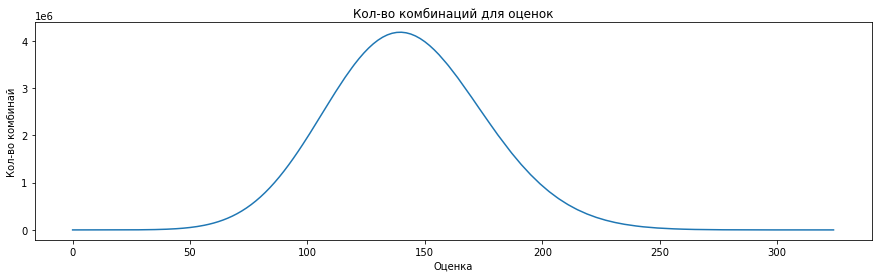

In [9]:
plt.rcParams["figure.figsize"] = (15, 4)
sns.lineplot(gr.summs, gr.number)
plt.xlabel('Оценка')
plt.ylabel('Кол-во комбинай')
plt.title('Кол-во комбинаций для оценок')
plt.show()

Проверим  модель на нормальность
* рассмотрим гипотезу Н0, которая будет говорить о нормальности распределения
* Н1 будет утверждать то, что распределение модели ненормально
* для проверка используем тест Шапиро-Уилка при уровне значимости 0,05

In [10]:
from scipy.stats import shapiro
stat, p = shapiro(df.summs)
alpha = 0.05
if p > alpha:
        print('Распределение СКОРЕЕ НОРМАЛЬНО, не стоит отвергать гипотезу Н0, p = ', p)
else:
    print('Распределение СКОРЕЕ НЕНОРМАЛЬНО, стоит отвергнуть гипотезу Н0 и принять Н1, p = ', p)

Распределение СКОРЕЕ НОРМАЛЬНО, не стоит отвергать гипотезу Н0, p =  1.0


Имеем значение р = 1, что говорит о нормальности распределения значений в модели кол-ва комбинаций оценок и итоговых оценок

In [11]:
scores = pd.Series(df.summs)
scores.unique() # оценки, которые может получить одна страна при оценивании 27-ю странами

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  12,   9,  11,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  24,  21,  23,  25,
        26,  27,  28,  29,  30,  31,  32,  34,  36,  33,  35,  37,  38,
        39,  40,  41,  42,  43,  44,  46,  48,  45,  47,  49,  50,  51,
        52,  53,  54,  55,  56,  58,  60,  57,  59,  61,  62,  63,  64,
        65,  66,  67,  68,  70,  72,  69,  71,  73,  74,  75,  76,  77,
        78,  79,  80,  82,  84,  81,  83,  85,  86,  87,  88,  89,  90,
        91,  92,  94,  96,  93,  95,  97,  98,  99, 100, 101, 102, 103,
       104, 106, 108, 105, 107, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 120, 117, 119, 121, 122, 123, 124, 125, 126, 127, 128, 130,
       132, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 142, 144,
       141, 143, 145, 146, 147, 148, 149, 150, 151, 152, 154, 156, 153,
       155, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 165, 167,
       169, 170, 171, 172, 173, 174, 175, 176, 178, 180, 177, 17

In [12]:
# фактические оценки на Евровидении 2022 для победителя
tele_scores = pd.Series([7, 8, 8, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 10, 12, 10, 10, 12, 12, 12, 12, 10, 10, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 12])

In [13]:
print('Summ of tele-scores: ', tele_scores.sum())
top27tele = tele_scores.tail(27).sum()
bottom27tele = tele_scores.head(27).sum()
print('Top 27 scores sum: ', top27tele)
print('Bottom 27 scores sum: ', bottom27tele)
print('Quantity of countries voted via tele channels: ',tele_scores.count())

Summ of tele-scores:  439
Top 27 scores sum:  310
Bottom 27 scores sum:  297
Quantity of countries voted via tele channels:  39


In [14]:
from scipy import stats as st
distr = st.norm(scores.max() / 2, np.std(scores))  # задаем нормальное распределение
result = 1 - distr.cdf(top27tele)                      
print('Вероятность получения оценки', top27tele, '=', round(result, 6) * 100, '%')

Вероятность получения оценки 310 = 0.00039999999999999996 %


In [15]:
distr = st.norm(scores.max() / 2, np.std(scores)) 
result = 1 - distr.cdf(bottom27tele)   
print('Вероятность получения оценки', bottom27tele, '=', round(result, 6) * 100, '%')

Вероятность получения оценки 297 = 0.0024000000000000002 %


Отсортируем очки телезрителей и возьмем 27 из них снизу

In [16]:
tele_scores.sort_values().head(27).sum()

295

In [17]:
distr = st.norm(scores.max() / 2, np.std(scores)) 
result = 1- distr.cdf(tele_scores.sort_values().head(27).sum())
print('Вероятность получения нижнего среза очков зрителей по сумме', \
      tele_scores.sort_values().head(27).sum(), '=', round(result, 6) * 100, '%')

Вероятность получения нижнего среза очков зрителей по сумме 295 = 0.0031999999999999997 %


### **Вывод**
1. Вероятность получения оценки из TOP-27 стран составляет 0.0004 %
2. Вероятность получения оценки из BOTTOM-27 стран составляет 0.0024 %
3. Вероятность получения оценки из нижнего сортированного среза 27 стран составляет 0.0032  %

Также следует признать, что **данный вывод** получен исходя из ограничения вычислительных мощностей для использованного способа расчета и **не удовлетворяет поставленной задаче**. В связи с этим вывод можно признать приблизительным и не отвечающим четко на поставленный вопрос.

## Решение №2

### Принцип решения
* Создаем нулевой списко длинной, равной кол-ву возможных оценок
* С помощью комбинаторики узнаем, сколько комбинаций соответствует каждой оценке
* Вносим кол-во (сумму) комбинаций для каждой оценки, используя оценку в качестве индекса списка

In [21]:
n_countries = 39                                                # кол-во стран
marks_fc = [0,1,2,3,4,6,7,8,10,12]                              # оценки
num_list = [0] * (n_countries * max(marks_fc))
num_list.append(0)                                              # список
len(num_list)

469

Кол-во комбинаций с замещением для 39 стран

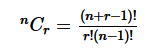

In [22]:
math.factorial(n_countries + len(marks_fc) -1) / (math.factorial(n_countries) * math.factorial(len(marks_fc) -1))

1677106640.0

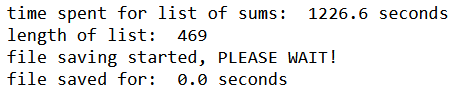

In [23]:
df = pd.read_csv("D://out39.csv")

In [24]:
df = df.rename(columns = {'Unnamed: 0':'mark', '0':'summs'})
df.head(2)

,mark,summs
0,0,1
1,1,1


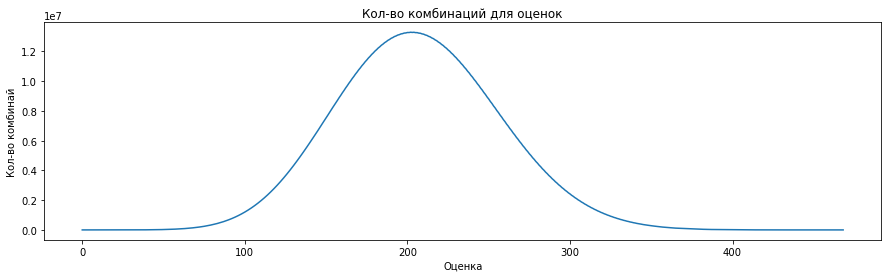

In [25]:
plt.rcParams["figure.figsize"] = (15, 4)
sns.lineplot(df.mark, df.summs)
plt.xlabel('Оценка')
plt.ylabel('Кол-во комбинай')
plt.title('Кол-во комбинаций для оценок')
plt.show()

Как и в первом варинате решения распределение имеет нормальный вид

Исходя из определения вероятнсти расчитаем необходимый параметр следующим способом: разделим сумму возможножных комбинаций для оценок выше или равной полученной на сумму всех комбинаций

In [20]:
df.query('mark >= 439').summs.sum() / df.summs.sum()*100

6.839159613606921e-05

### **Вывод**

* Проведено моделирование комбинаций оценок для 39 стран
* Распределение комбинаций оценок имеет нормальный вид
* Кол-во комбинаций составило 1.677.106.640
* Вероятность получения оценки 439 баллов от 39 стран составила 6.8e-05 %

Также:
* Расчет комбинаций занял по продолжительности 20 мину, 26 секунд
* При расчете отсутствовало избыточное задействование ресурсов ПК, и расчет проведен полностью в соответствии с условием задачи



## Ответ

Победитель конкурса Евровидение 2022 имел вероятность получить итоговую оценку с 6.8e-05 %